In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import matplotlib as mpl
import seaborn as sns
from math import ceil

In [49]:
df = pd.read_csv('learningSet.csv')
df

C:\Users\shakt\AppData\Local\Temp\ipykernel_12572\3708753459.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [51]:
df.shape

(95412, 481)

In [52]:
numerical = df.select_dtypes(include=np.number)
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [53]:
numerical.isnull().all()

ODATEDW     False
TCODE       False
DOB         False
AGE         False
NUMCHLD     False
            ...  
TARGET_B    False
TARGET_D    False
HPHONE_D    False
RFA_2F      False
CLUSTER2    False
Length: 407, dtype: bool

In [54]:
count = numerical.isnull().sum()
count


ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64

In [55]:
for col in numerical.columns:
    pct_missing = np.mean(numerical[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

ODATEDW - 0%
TCODE - 0%
DOB - 0%
AGE - 25%
NUMCHLD - 87%
INCOME - 22%
WEALTH1 - 47%
HIT - 0%
MBCRAFT - 55%
MBGARDEN - 55%
MBBOOKS - 55%
MBCOLECT - 55%
MAGFAML - 55%
MAGFEM - 55%
MAGMALE - 55%
PUBGARDN - 55%
PUBCULIN - 55%
PUBHLTH - 55%
PUBDOITY - 55%
PUBNEWFN - 55%
PUBPHOTO - 55%
PUBOPP - 55%
MALEMILI - 0%
MALEVET - 0%
VIETVETS - 0%
WWIIVETS - 0%
LOCALGOV - 0%
STATEGOV - 0%
FEDGOV - 0%
WEALTH2 - 46%
POP901 - 0%
POP902 - 0%
POP903 - 0%
POP90C1 - 0%
POP90C2 - 0%
POP90C3 - 0%
POP90C4 - 0%
POP90C5 - 0%
ETH1 - 0%
ETH2 - 0%
ETH3 - 0%
ETH4 - 0%
ETH5 - 0%
ETH6 - 0%
ETH7 - 0%
ETH8 - 0%
ETH9 - 0%
ETH10 - 0%
ETH11 - 0%
ETH12 - 0%
ETH13 - 0%
ETH14 - 0%
ETH15 - 0%
ETH16 - 0%
AGE901 - 0%
AGE902 - 0%
AGE903 - 0%
AGE904 - 0%
AGE905 - 0%
AGE906 - 0%
AGE907 - 0%
CHIL1 - 0%
CHIL2 - 0%
CHIL3 - 0%
AGEC1 - 0%
AGEC2 - 0%
AGEC3 - 0%
AGEC4 - 0%
AGEC5 - 0%
AGEC6 - 0%
AGEC7 - 0%
CHILC1 - 0%
CHILC2 - 0%
CHILC3 - 0%
CHILC4 - 0%
CHILC5 - 0%
HHAGE1 - 0%
HHAGE2 - 0%
HHAGE3 - 0%
HHN1 - 0%
HHN2 - 0%
HHN3 - 0%
HHN4 - 0%

In [56]:
#Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [57]:
# List of columns to keep
columns_to_keep = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

# Drop columns not in the list of columns to keep
listed_column = df.drop(columns=df.columns.difference(columns_to_keep))

print(listed_column)

       WEALTH1     MSA    ADI    DMA GEOCODE2
0          NaN     0.0  177.0  682.0        C
1          9.0  4480.0   13.0  803.0        A
2          1.0     0.0  281.0  518.0        C
3          4.0  9340.0   67.0  862.0        C
4          2.0  5000.0  127.0  528.0        A
...        ...     ...    ...    ...      ...
95407      NaN   380.0    0.0  743.0        C
95408      9.0  3360.0  201.0  618.0        A
95409      NaN  4040.0   61.0  551.0        B
95410      NaN  8735.0   13.0  803.0        A
95411      8.0  9200.0  355.0  550.0        C

[95412 rows x 5 columns]


In [58]:
for col in listed_column.columns:
    pct_missing = np.mean(listed_column[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

WEALTH1 - 47%
MSA - 0%
ADI - 0%
DMA - 0%
GEOCODE2 - 0%


In [59]:

cleaning_listed_column =listed_column.dropna(subset=['WEALTH1', 'MSA', 'ADI', 'DMA', 'GEOCODE2'])

print(cleaning_listed_column)

       WEALTH1     MSA    ADI    DMA GEOCODE2
1          9.0  4480.0   13.0  803.0        A
2          1.0     0.0  281.0  518.0        C
3          4.0  9340.0   67.0  862.0        C
4          2.0  5000.0  127.0  528.0        A
6          6.0     0.0   91.0  509.0        D
...        ...     ...    ...    ...      ...
95400      9.0  5000.0  127.0  528.0        A
95401      8.0   760.0  249.0  716.0        B
95406      6.0  5960.0  329.0  534.0        C
95408      9.0  3360.0  201.0  618.0        A
95411      8.0  9200.0  355.0  550.0        C

[50648 rows x 5 columns]


## EDA

In [62]:
cleaning_listed_column .describe()

,WEALTH1,MSA,ADI,DMA
count,50648.000000,50648.000000,50648.000000,50648.000000
mean,5.345601,3599.366451,186.691715,658.010366
std,2.742374,2815.508352,134.036482,111.711019
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,920.000000,67.000000,560.000000
50%,6.000000,3360.000000,175.000000,625.000000
75%,8.000000,5960.000000,279.000000,770.000000
max,9.000000,9360.000000,651.000000,881.000000


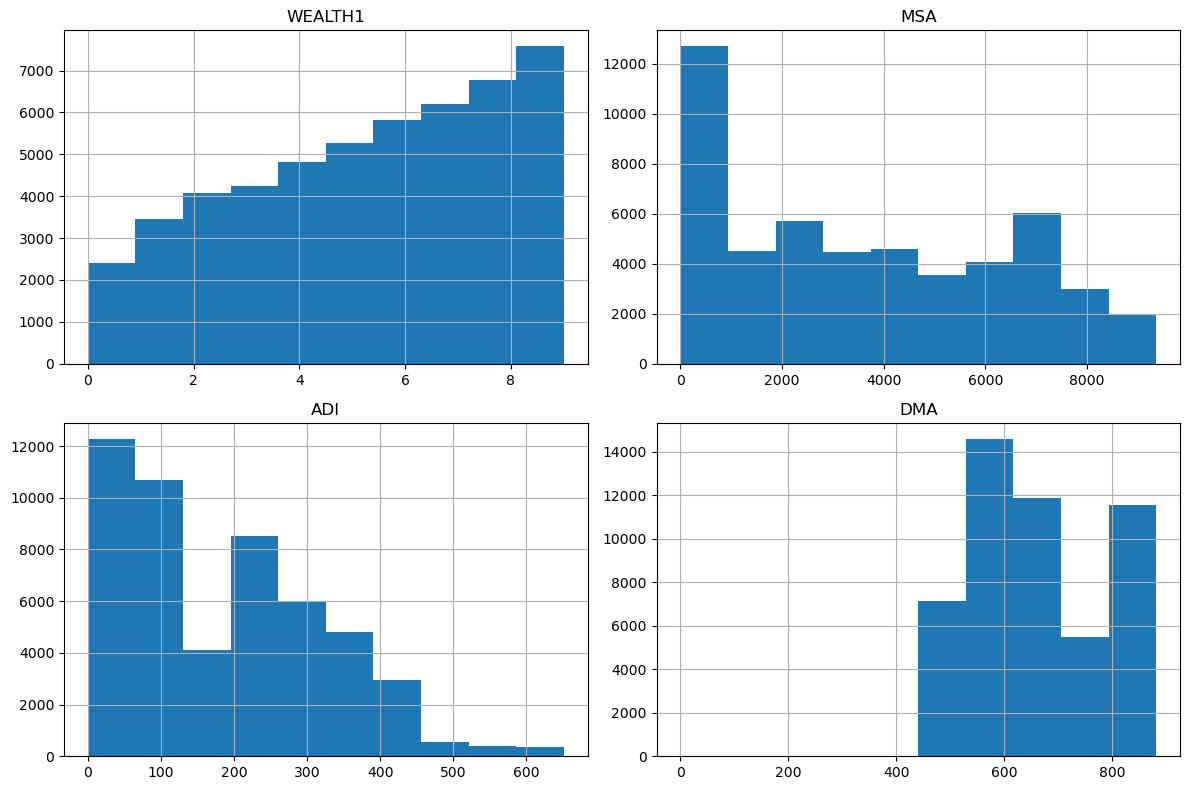

In [63]:
cleaning_listed_column.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [67]:
numerical_cleaning_listed_column = cleaning_listed_column.select_dtypes(include=np.number)
numerical_cleaning_listed_column

,WEALTH1,MSA,ADI,DMA
1,9.0,4480.0,13.0,803.0
2,1.0,0.0,281.0,518.0
3,4.0,9340.0,67.0,862.0
4,2.0,5000.0,127.0,528.0
6,6.0,0.0,91.0,509.0
...,...,...,...,...
95400,9.0,5000.0,127.0,528.0
95401,8.0,760.0,249.0,716.0
95406,6.0,5960.0,329.0,534.0
95408,9.0,3360.0,201.0,618.0


In [68]:
correlation_matrix = numerical_cleaning_listed_column.corr()
correlation_matrix 

,WEALTH1,MSA,ADI,DMA
WEALTH1,1.000000,0.141149,-0.093270,-0.049469
MSA,0.141149,1.000000,-0.161054,0.292338
ADI,-0.093270,-0.161054,1.000000,-0.087916
DMA,-0.049469,0.292338,-0.087916,1.000000


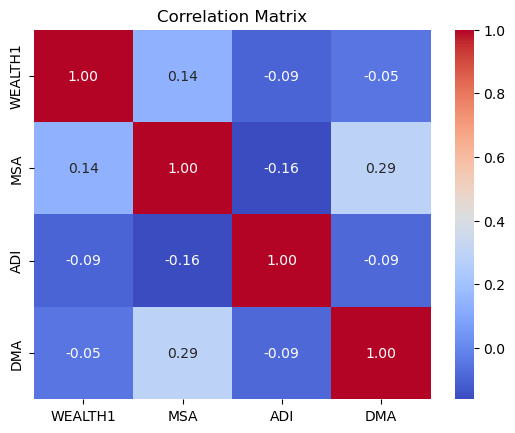

In [69]:

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


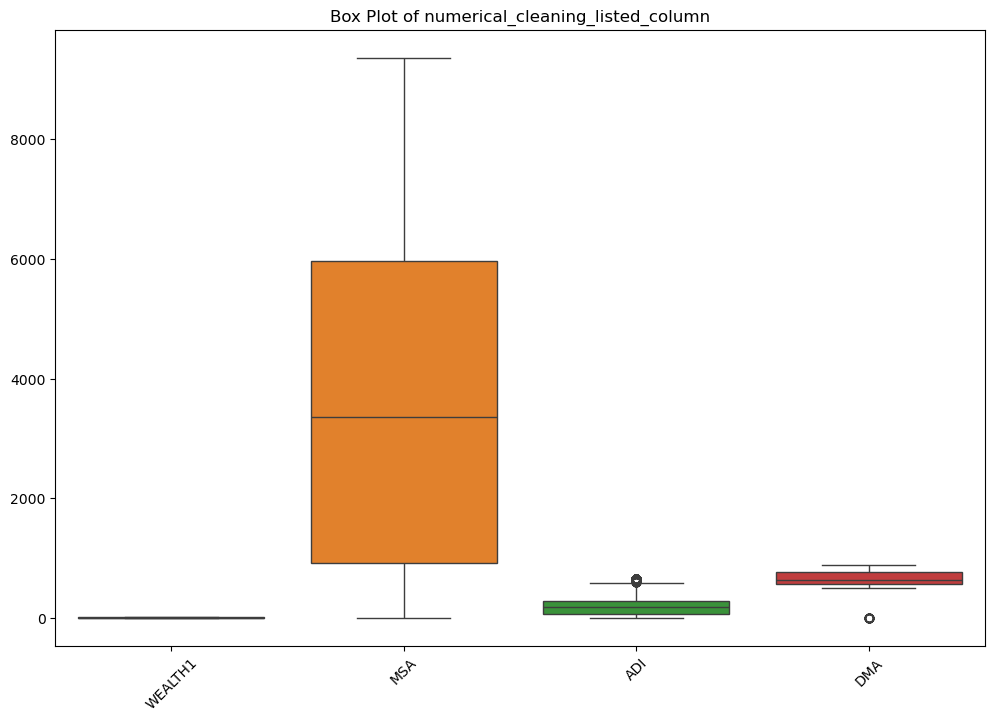

In [71]:
# Box Plots or Violin Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_cleaning_listed_column )
plt.title('Box Plot of numerical_cleaning_listed_column')
plt.xticks(rotation=45)
plt.show()


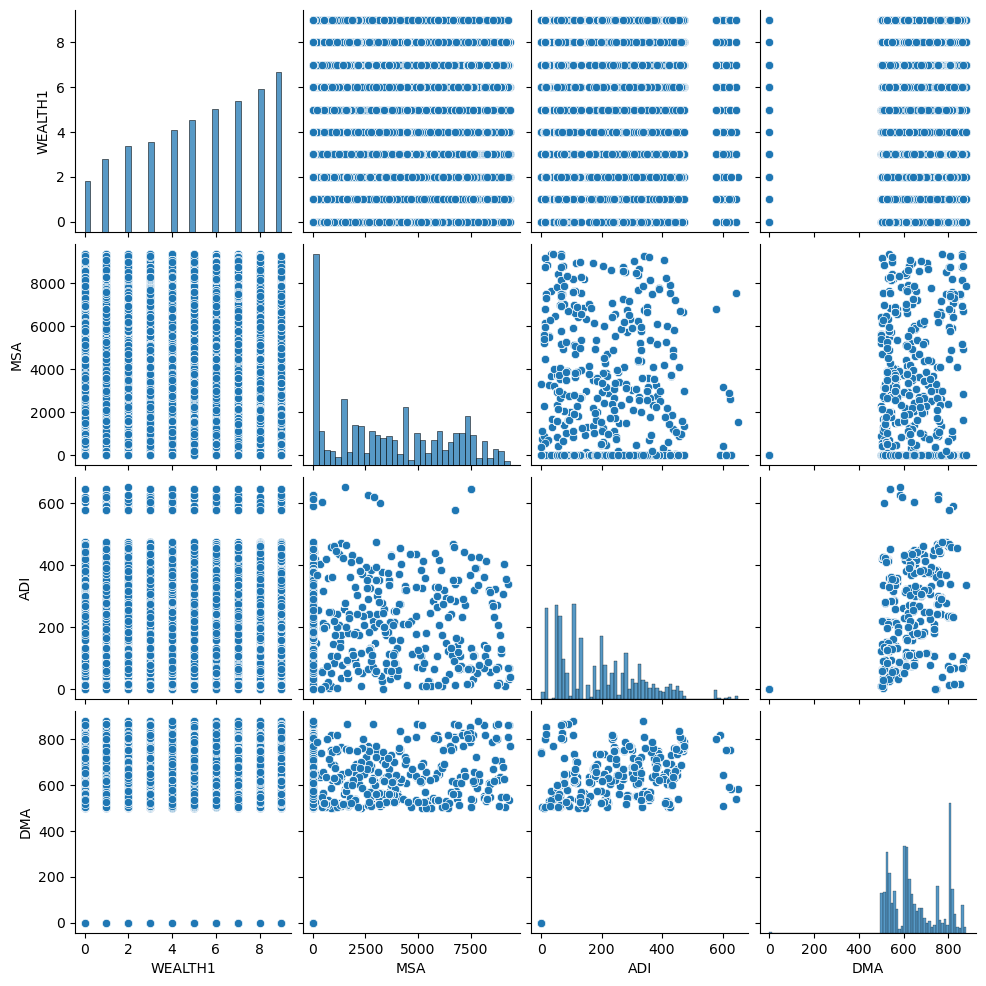

In [72]:

# Pair Plots
sns.pairplot(numerical_cleaning_listed_column)
plt.show()